In [1]:
!python --version
#!dir VRF_SetPoint_study

Python 3.6.8
Wall time: 27 ms


In [12]:
import os
import pandas as pd
import numpy as np

Wall time: 0 ns


In [3]:
datafolder = 'VRF_SetPoint_study/'
dflist = []
for i in os.listdir(datafolder):
    dflist.append(pd.read_csv(datafolder+i))

Wall time: 2.42 s


In [4]:
df = pd.concat(dflist, axis=0)

Wall time: 63 ms


In [5]:
# convert indices to datetime
df['Time'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.drop(labels=['Date'], axis=1, inplace = True)
df.index = df['Time']
df.drop(labels=['Time'], axis=1, inplace = True)
df.sort_index(inplace=True)
df.dropna(how='all', axis=1, inplace = True)

Wall time: 432 ms


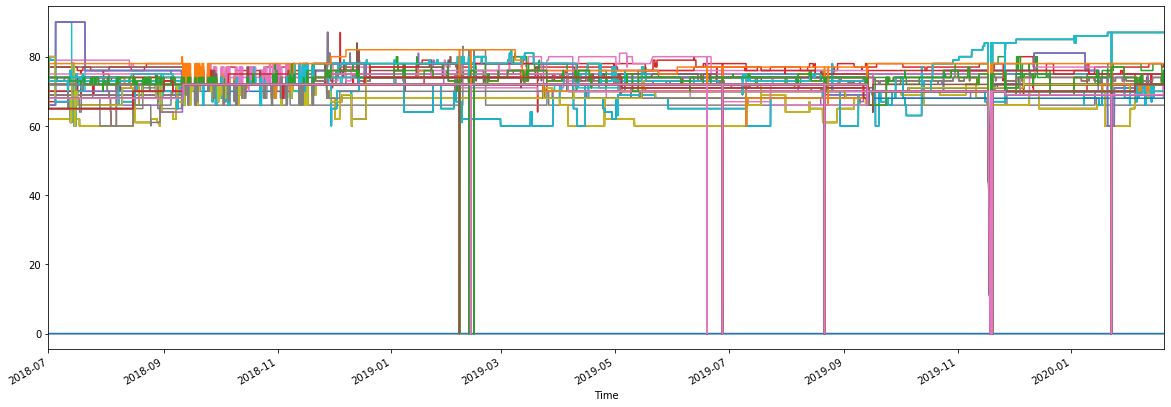

In [6]:
#plot the data
df.plot(y=df.columns, figsize=(20,7), legend=False)

### Plot without outliers

In [7]:
df2 = df.copy(deep=True)

In [8]:
# remove columns with many NaNs
df2.dropna(axis=1, thresh=int(df2.shape[0]*0.95), inplace=True)
# remove any row with atleast a single NaN
df2.dropna(axis=0, how='any', inplace=True)

In [9]:
#create a statistic to identify error in the sensor data
des = df2.describe()

In [13]:
#identify the erroneous sensors
error_cols = np.where(des.loc['mean',:].to_numpy()==0)
#remove erroneous sensors
df2.drop(columns=df2.columns[error_cols], inplace=True)

In [14]:
upperbound = 80.0
lowerbound = 40.0
# create a measure of which rows lie outside a bound
df2['keep'] = df2.apply(lambda row: int(all([(x < upperbound) and (x > lowerbound) for x in row])), axis = 1)
# print what percentage of data is retained
print('{} % data will be retained'.format(100*sum(df2['keep'])/df2.shape[0]))

48.474097218909506 % data will be retained


In [15]:
# keep only rows where data is not an outlier
df2 = df2[df2['keep'] == 1]
# remove indicator
df2.drop(labels=['keep'], inplace=True, axis=1)

c:\users\nauga\box sync\smartbuildings\py36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


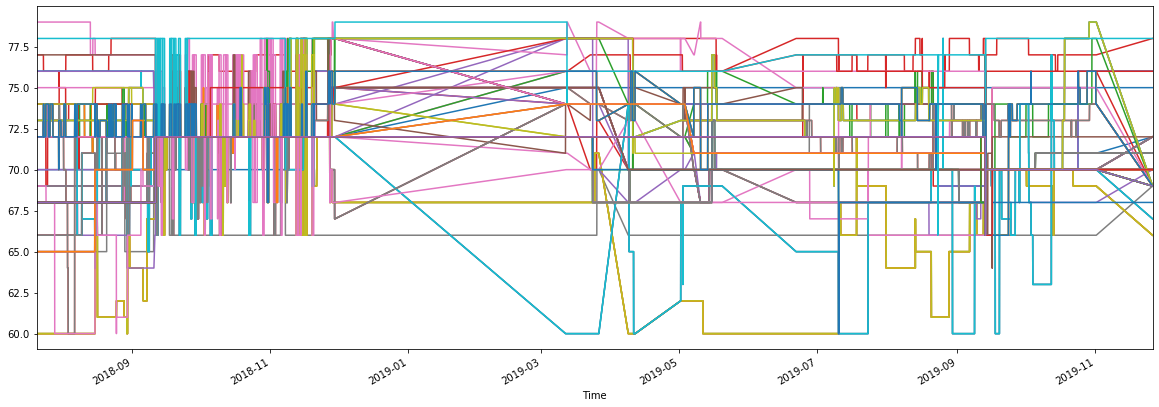

In [16]:
#plot the data
df2.plot(y=df2.columns, figsize=(20,7), legend=False)

### Larger plot

In [21]:
# data inspection
def datainspect(df):
    from matplotlib import pyplot as plt
    width, height = 20, int(df.shape[1]*3)
    plt.rcParams["figure.figsize"] = (width, height)
    fig,ax = plt.subplots(df.shape[1],1)
    for i,j in zip(df.columns,range(df.shape[1])):
        df.plot(y=[i],ax=ax[j],style=['b--'], legend=False)

In [ ]:
datainspect(df2)

### Mean Values

In [28]:
#Unitwise means
df2.describe().loc['mean',:].to_numpy()

array([70.87291649, 70.87289188, 70.87289188, 73.51476757, 70.91006606,
       73.1352761 , 73.13536221, 71.39984993, 66.5025894 , 66.5026263 ,
       72.8293211 , 66.5026263 , 70.90977083, 76.51375887, 70.91006606,
       70.88182254, 73.04155339, 66.19942676, 73.13536221, 73.13536221,
       70.90996765, 66.5025894 , 73.041578  , 72.04422275, 71.32213106,
       69.73329807, 69.73329807, 71.43423173, 66.5026263 , 73.03612857,
       73.03612857, 70.90991844, 70.58295302, 70.86939835, 69.20268658,
       69.73329807, 73.01435548, 70.90991844, 70.93206057, 70.86934914,
       70.4412434 , 70.88125669, 70.4412434 , 70.44102198, 70.49914507,
       70.4412434 , 70.4412434 , 68.59096109, 70.86959517, 70.91009066,
       68.5910103 , 73.12057619, 73.55394683, 70.44102198, 70.44104658,
       70.90999225, 72.94607162, 70.44102198, 70.90999225, 70.90994305,
       70.91009066, 70.91009066, 70.91009066, 70.88187175, 73.03612857,
       73.97600039, 73.14008586, 72.04422275, 70.90996765, 68.59

In [29]:
np.average(df2.describe().loc['mean',:])

71.03316902468613